### LIBRARY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [3]:
df = pd.read_csv("../DATA/DATA.csv",  encoding='ISO-8859-1')

In [4]:
df.head()

date.time  Inside Temp   High Inside Temp   Low Inside Temp   \
0  2/24/2024 10:45          23.9               23.9              23.8   
1  2/24/2024 10:50          24.2               24.3              24.0   
2  2/24/2024 10:55          24.4               24.4              24.2   
3  2/24/2024 11:00          24.7               24.7              24.4   
4  2/24/2024 11:05          24.9               24.9              24.7   

   Inside Hum   High Inside Hum   Low Inside Hum  Inside Dew Point - °C  \
0         60.5              60.5            57.3                   15.8   
1         62.7              62.7            60.7                   16.6   
2         64.3              64.5            63.4                   17.3   
3         64.8              65.0            64.5                   17.6   
4         64.9              64.9            64.6                   17.8   

   Inside Heat Index  Barometer   ...  Low Hum .1  Dew Point .1  \
0               24.3      1019.7  ...        57.1          57.1   
1               24.6      1019.6  ...        57.1          57.1   
2               25.0      1019.6  ...        57.1          57.1   
3               25.3      1019.5  ...        60.4          57.0   
4               25.6      1019.5  ...        60.4          57.0   

   High Dew Point  Low Dew Point .1 Wet Bulb .1 High Wet Bulb .1  \
0             18.8             18.8        18.8             20.9   
1             18.8             18.8        18.8             20.9   
2             18.8             18.8        18.8             20.9   
3             18.8             18.9        18.6             20.8   
4             18.8             18.9        18.6             20.8   

  Low Wet Bulb .1 Heat Index .1 High Heat Index Unnamed: 71  
0            20.9          20.9            29.2        29.2  
1            20.9          20.9            29.2        29.2  
2            20.9          20.9            29.2        29.2  
3            21.0          20.7            28.1        29.3  
4            21.0          20.7            28.1        29.3  

[5 rows x 72 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47839 entries, 0 to 47838
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date.time                  47839 non-null  object 
 1   Inside Temp                47839 non-null  float64
 2   High Inside Temp           47839 non-null  float64
 3   Low Inside Temp            47839 non-null  float64
 4   Inside Hum                 47839 non-null  float64
 5   High Inside Hum            47839 non-null  float64
 6   Low Inside Hum             47839 non-null  float64
 7   Inside Dew Point - °C      47839 non-null  float64
 8   Inside Heat Index          47839 non-null  float64
 9   Barometer                  47839 non-null  float64
 10  High Bar                   47839 non-null  float64
 11  Low Bar                    47839 non-null  float64
 12  Absolute Pressure          47839 non-null  float64
 13  Temp                       47839 non-null  obj

In [6]:
df.columns

Index(['date.time', 'Inside Temp ', 'High Inside Temp ', 'Low Inside Temp ',
       'Inside Hum ', 'High Inside Hum ', 'Low Inside Hum',
       'Inside Dew Point - °C', 'Inside Heat Index', 'Barometer ', 'High Bar ',
       'Low Bar ', 'Absolute Pressure ', 'Temp ', 'High Temp ', 'Low Temp',
       'Hum ', 'High Hum ', 'Low Hum ', 'Dew Point ', 'High Dew Point',
       'Low Dew Point ', 'Wet Bulb ', 'High Wet Bulb ', 'Low Wet Bulb ',
       'Avg Wind Speed ', 'Prevailing Wind Direction', 'High Wind Speed ',
       'High Wind Direction', 'Wind Chill', 'Low Wind Chill ', 'Heat Index ',
       'High Heat Index ', 'THW Index ', 'High THW Index ', 'Low THW Index ',
       'Wind Run ', 'THSW Index', 'High THSW Index ', 'Low THSW Index ',
       'Rain ', 'High Rain Rate ', 'Solar Rad ', 'High Solar Rad ', 'UV Index',
       'High UV Index', 'UV Dose ', 'Heating Degree Days',
       'Cooling Degree Days', 'AQI', 'High AQI', 'PM 1', 'High PM 1 ',
       'PM 2.5 ', 'High PM 2.5 ', 'PM 10 ', 'Hig

In [7]:
column_details = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Memory Usage (KB)': [df[col].memory_usage(deep=True) // 1024 for col in df.columns],
        'Null Values': df.isnull().sum().values,
        'Null Percentage (%)': (df.isnull().sum() / len(df) * 100).round(2).values,
        'Non-Null Values': df.notnull().sum().values,
        'Unique Values': df.nunique().values,
        'Most Frequent Value': [df[col].mode().iloc[0] if not df[col].mode().empty else np.nan for col in df.columns],
        'Min Value': [df[col].min() if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
        'Max Value': [df[col].max() if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns]
    })

print(column_details)

          Column Name Data Type  Memory Usage (KB)  Null Values  \
0           date.time    object               2997            0   
1        Inside Temp    float64                373            0   
2   High Inside Temp    float64                373            0   
3    Low Inside Temp    float64                373            0   
4         Inside Hum    float64                373            0   
..                ...       ...                ...          ...   
67   High Wet Bulb .1   float64                373            0   
68    Low Wet Bulb .1   float64                373            0   
69      Heat Index .1   float64                373            0   
70    High Heat Index   float64                373            0   
71        Unnamed: 71   float64                373            0   

    Null Percentage (%)  Non-Null Values  Unique Values Most Frequent Value  \
0                   0.0            47839          47839    03-01-2024 00:00   
1                   0.0            47

In [10]:
df['date.time'] = pd.to_datetime(df['date.time'], errors='coerce')

df = df.loc[:, ~df.columns.str.contains('Unnamed')]

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(axis=1, how='all', inplace=True)

df.dropna(subset=['date.time'], inplace=True)

In [11]:
df.head()

date.time  Inside Temp   High Inside Temp   Low Inside Temp   \
0 2024-02-24 10:45:00          23.9               23.9              23.8   
1 2024-02-24 10:50:00          24.2               24.3              24.0   
2 2024-02-24 10:55:00          24.4               24.4              24.2   
3 2024-02-24 11:00:00          24.7               24.7              24.4   
4 2024-02-24 11:05:00          24.9               24.9              24.7   

   Inside Hum   High Inside Hum   Low Inside Hum  Inside Dew Point - °C  \
0         60.5              60.5            57.3                   15.8   
1         62.7              62.7            60.7                   16.6   
2         64.3              64.5            63.4                   17.3   
3         64.8              65.0            64.5                   17.6   
4         64.9              64.9            64.6                   17.8   

   Inside Heat Index  Barometer   ...  High Hum .1  Low Hum .1  Dew Point .1  \
0               24.3      1019.7  ...         57.1        57.1          57.1   
1               24.6      1019.6  ...         57.1        57.1          57.1   
2               25.0      1019.6  ...         57.1        57.1          57.1   
3               25.3      1019.5  ...         60.3        60.4          57.0   
4               25.6      1019.5  ...         60.3        60.4          57.0   

   High Dew Point   Low Dew Point .1  Wet Bulb .1  High Wet Bulb .1  \
0             18.8              18.8         18.8              20.9   
1             18.8              18.8         18.8              20.9   
2             18.8              18.8         18.8              20.9   
3             18.8              18.9         18.6              20.8   
4             18.8              18.9         18.6              20.8   

   Low Wet Bulb .1  Heat Index .1  High Heat Index  
0             20.9           20.9             29.2  
1             20.9           20.9             29.2  
2             20.9           20.9             29.2  
3             21.0           20.7             28.1  
4             21.0           20.7             28.1  

[5 rows x 69 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28383 entries, 0 to 45662
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date.time              28383 non-null  datetime64[ns]
 1   Inside Temp            28383 non-null  float64       
 2   High Inside Temp       28383 non-null  float64       
 3   Low Inside Temp        28383 non-null  float64       
 4   Inside Hum             28383 non-null  float64       
 5   High Inside Hum        28383 non-null  float64       
 6   Low Inside Hum         28383 non-null  float64       
 7   Inside Dew Point - °C  28383 non-null  float64       
 8   Inside Heat Index      28383 non-null  float64       
 9   Barometer              28383 non-null  float64       
 10  High Bar               28383 non-null  float64       
 11  Low Bar                28383 non-null  float64       
 12  Absolute Pressure      28383 non-null  float64       
 13  Temp  

In [14]:
print(df.columns.tolist())

['date.time', 'Inside Temp ', 'High Inside Temp ', 'Low Inside Temp ', 'Inside Hum ', 'High Inside Hum ', 'Low Inside Hum', 'Inside Dew Point - °C', 'Inside Heat Index', 'Barometer ', 'High Bar ', 'Low Bar ', 'Absolute Pressure ', 'Temp ', 'High Temp ', 'Low Temp', 'Hum ', 'High Hum ', 'Low Hum ', 'Dew Point ', 'High Dew Point', 'Low Dew Point ', 'Wet Bulb ', 'High Wet Bulb ', 'Low Wet Bulb ', 'Avg Wind Speed ', 'High Wind Speed ', 'Wind Chill', 'Low Wind Chill ', 'Heat Index ', 'High Heat Index ', 'THW Index ', 'High THW Index ', 'Low THW Index ', 'Wind Run ', 'THSW Index', 'High THSW Index ', 'Low THSW Index ', 'Rain ', 'High Rain Rate ', 'Solar Rad ', 'High Solar Rad ', 'UV Index', 'High UV Index', 'UV Dose ', 'Heating Degree Days', 'Cooling Degree Days', 'AQI', 'High AQI', 'PM 1', 'High PM 1 ', 'PM 2.5 ', 'High PM 2.5 ', 'PM 10 ', 'High PM 10 ', 'Temp .1', 'High Temp .1', 'Low Temp ', 'Hum .1', 'High Hum .1', 'Low Hum .1', 'Dew Point .1', 'High Dew Point ', 'Low Dew Point .1', 'Wet

In [15]:
df.columns = df.columns.str.strip()

temperature_col = next((col for col in df.columns if "Temp" in col and "High" not in col and "Low" not in col), None)
humidity_col = next((col for col in df.columns if "Hum" in col and "High" not in col and "Low" not in col), None)
pressure_col = next((col for col in df.columns if "Barometer" in col or "Pressure" in col), None)

print(f"Temperature Column: {temperature_col}")
print(f"Humidity Column: {humidity_col}")
print(f"Pressure Column: {pressure_col}")


Temperature Column: Inside Temp
Humidity Column: Inside Hum
Pressure Column: Barometer


### 📈 **TIME-SERIES TRENDS FOR TEMPERATURE, HUMIDITY, AND PRESSURE**
THIS PLOT VISUALIZES THE **CHANGES IN TEMPERATURE, HUMIDITY, AND BAROMETRIC PRESSURE** OVER TIME.


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

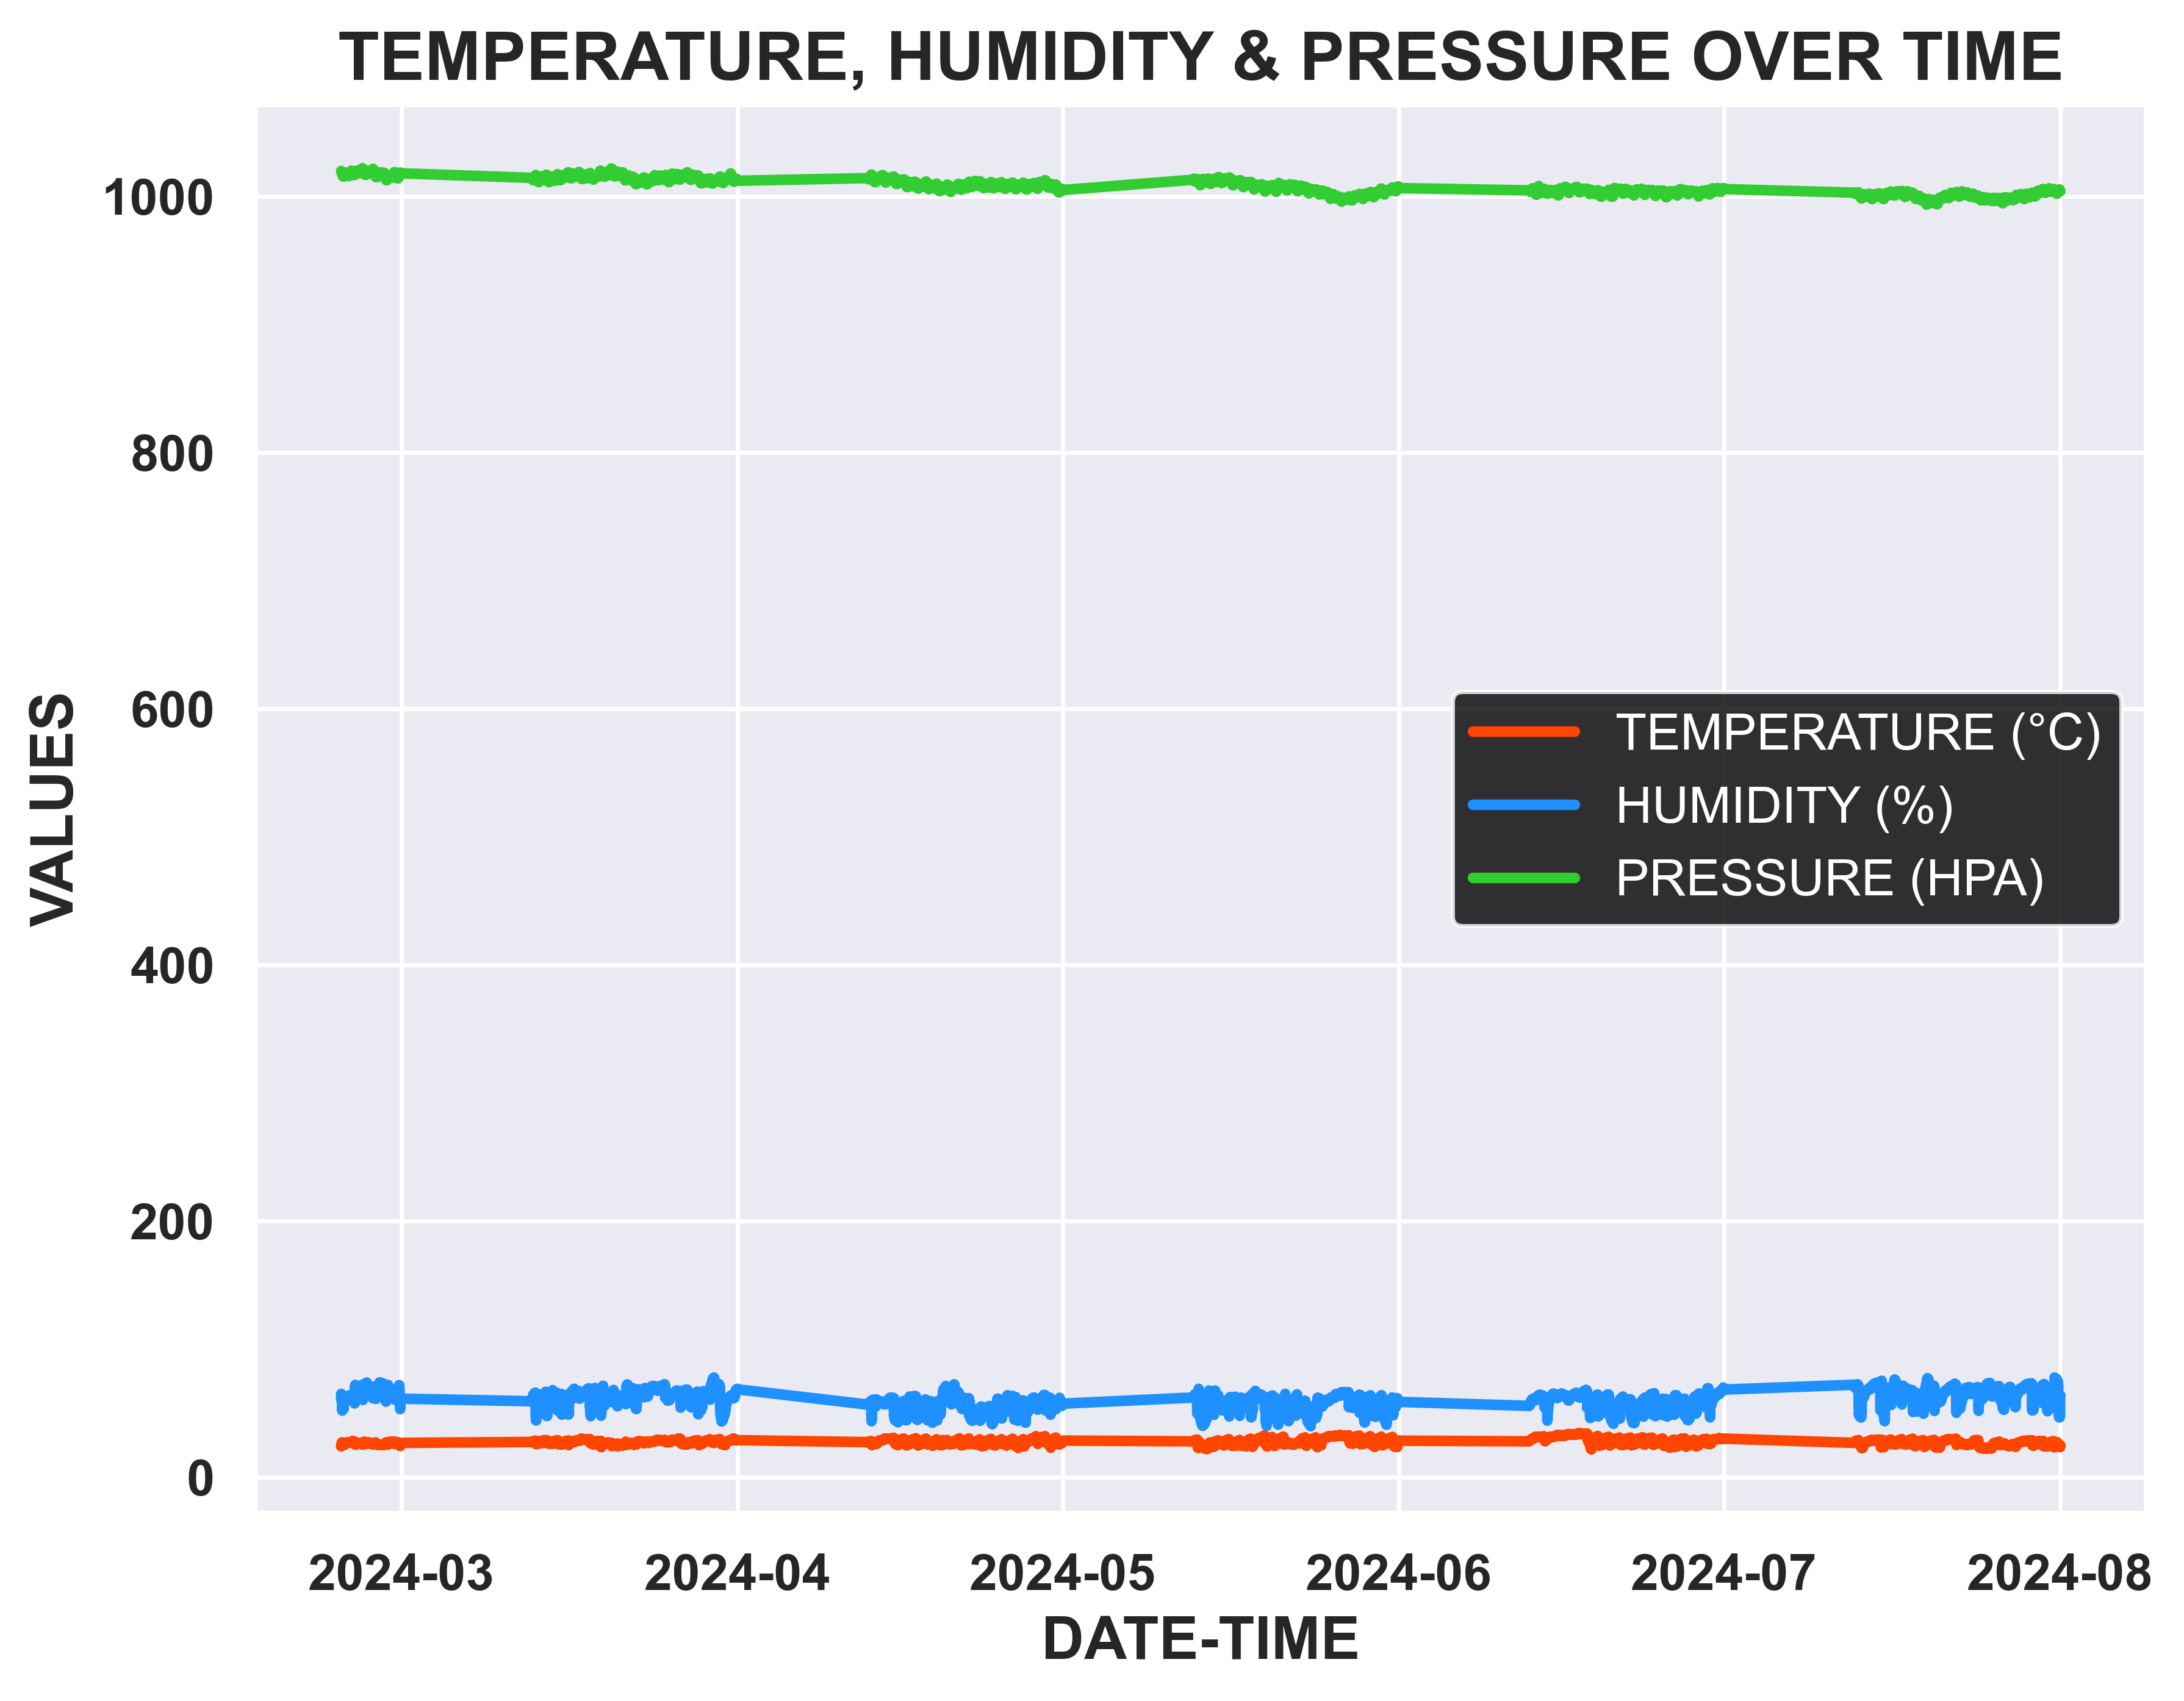

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(8,6), dpi=500)
plt.plot(df['date.time'], df["Inside Temp"], label="TEMPERATURE (°C)", color='#FF4500', linewidth=2.5)
plt.plot(df['date.time'], df["Inside Hum"], label="HUMIDITY (%)", color='#1E90FF', linewidth=2.5)
plt.plot(df['date.time'], df["Barometer"], label="PRESSURE (HPA)", color='#32CD32', linewidth=2.5)

plt.xlabel("DATE-TIME", fontsize=14, fontweight="bold")
plt.ylabel("VALUES", fontsize=14, fontweight="bold")
plt.title("TEMPERATURE, HUMIDITY & PRESSURE OVER TIME", fontsize=16, fontweight="bold")

plt.legend(fontsize=12, frameon=True, facecolor="black", edgecolor="white", fancybox=True, labelcolor='white')

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")


### 📊 **HISTOGRAM & KDE FOR TEMPERATURE, HUMIDITY, AND PRESSURE**
THESE PLOTS SHOW THE **DISTRIBUTION OF TEMPERATURE, HUMIDITY, AND PRESSURE** IN THE DATASET.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16556\2969220746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{int(tick)}" for tick in axes[0].get_xticks()], fontsize=12, fontweight="bold")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16556\2969220746.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels([f"{int(tick)}" for tick in axes[0].get_yticks()], fontsize=12, fontweight="bold")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16556\2969220746.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f"{int(tick)}" for tick in axes[1].get_xticks()], fontsize=12, fontweight="bold")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16556\2969220746.py:22: UserWarning: set_tick

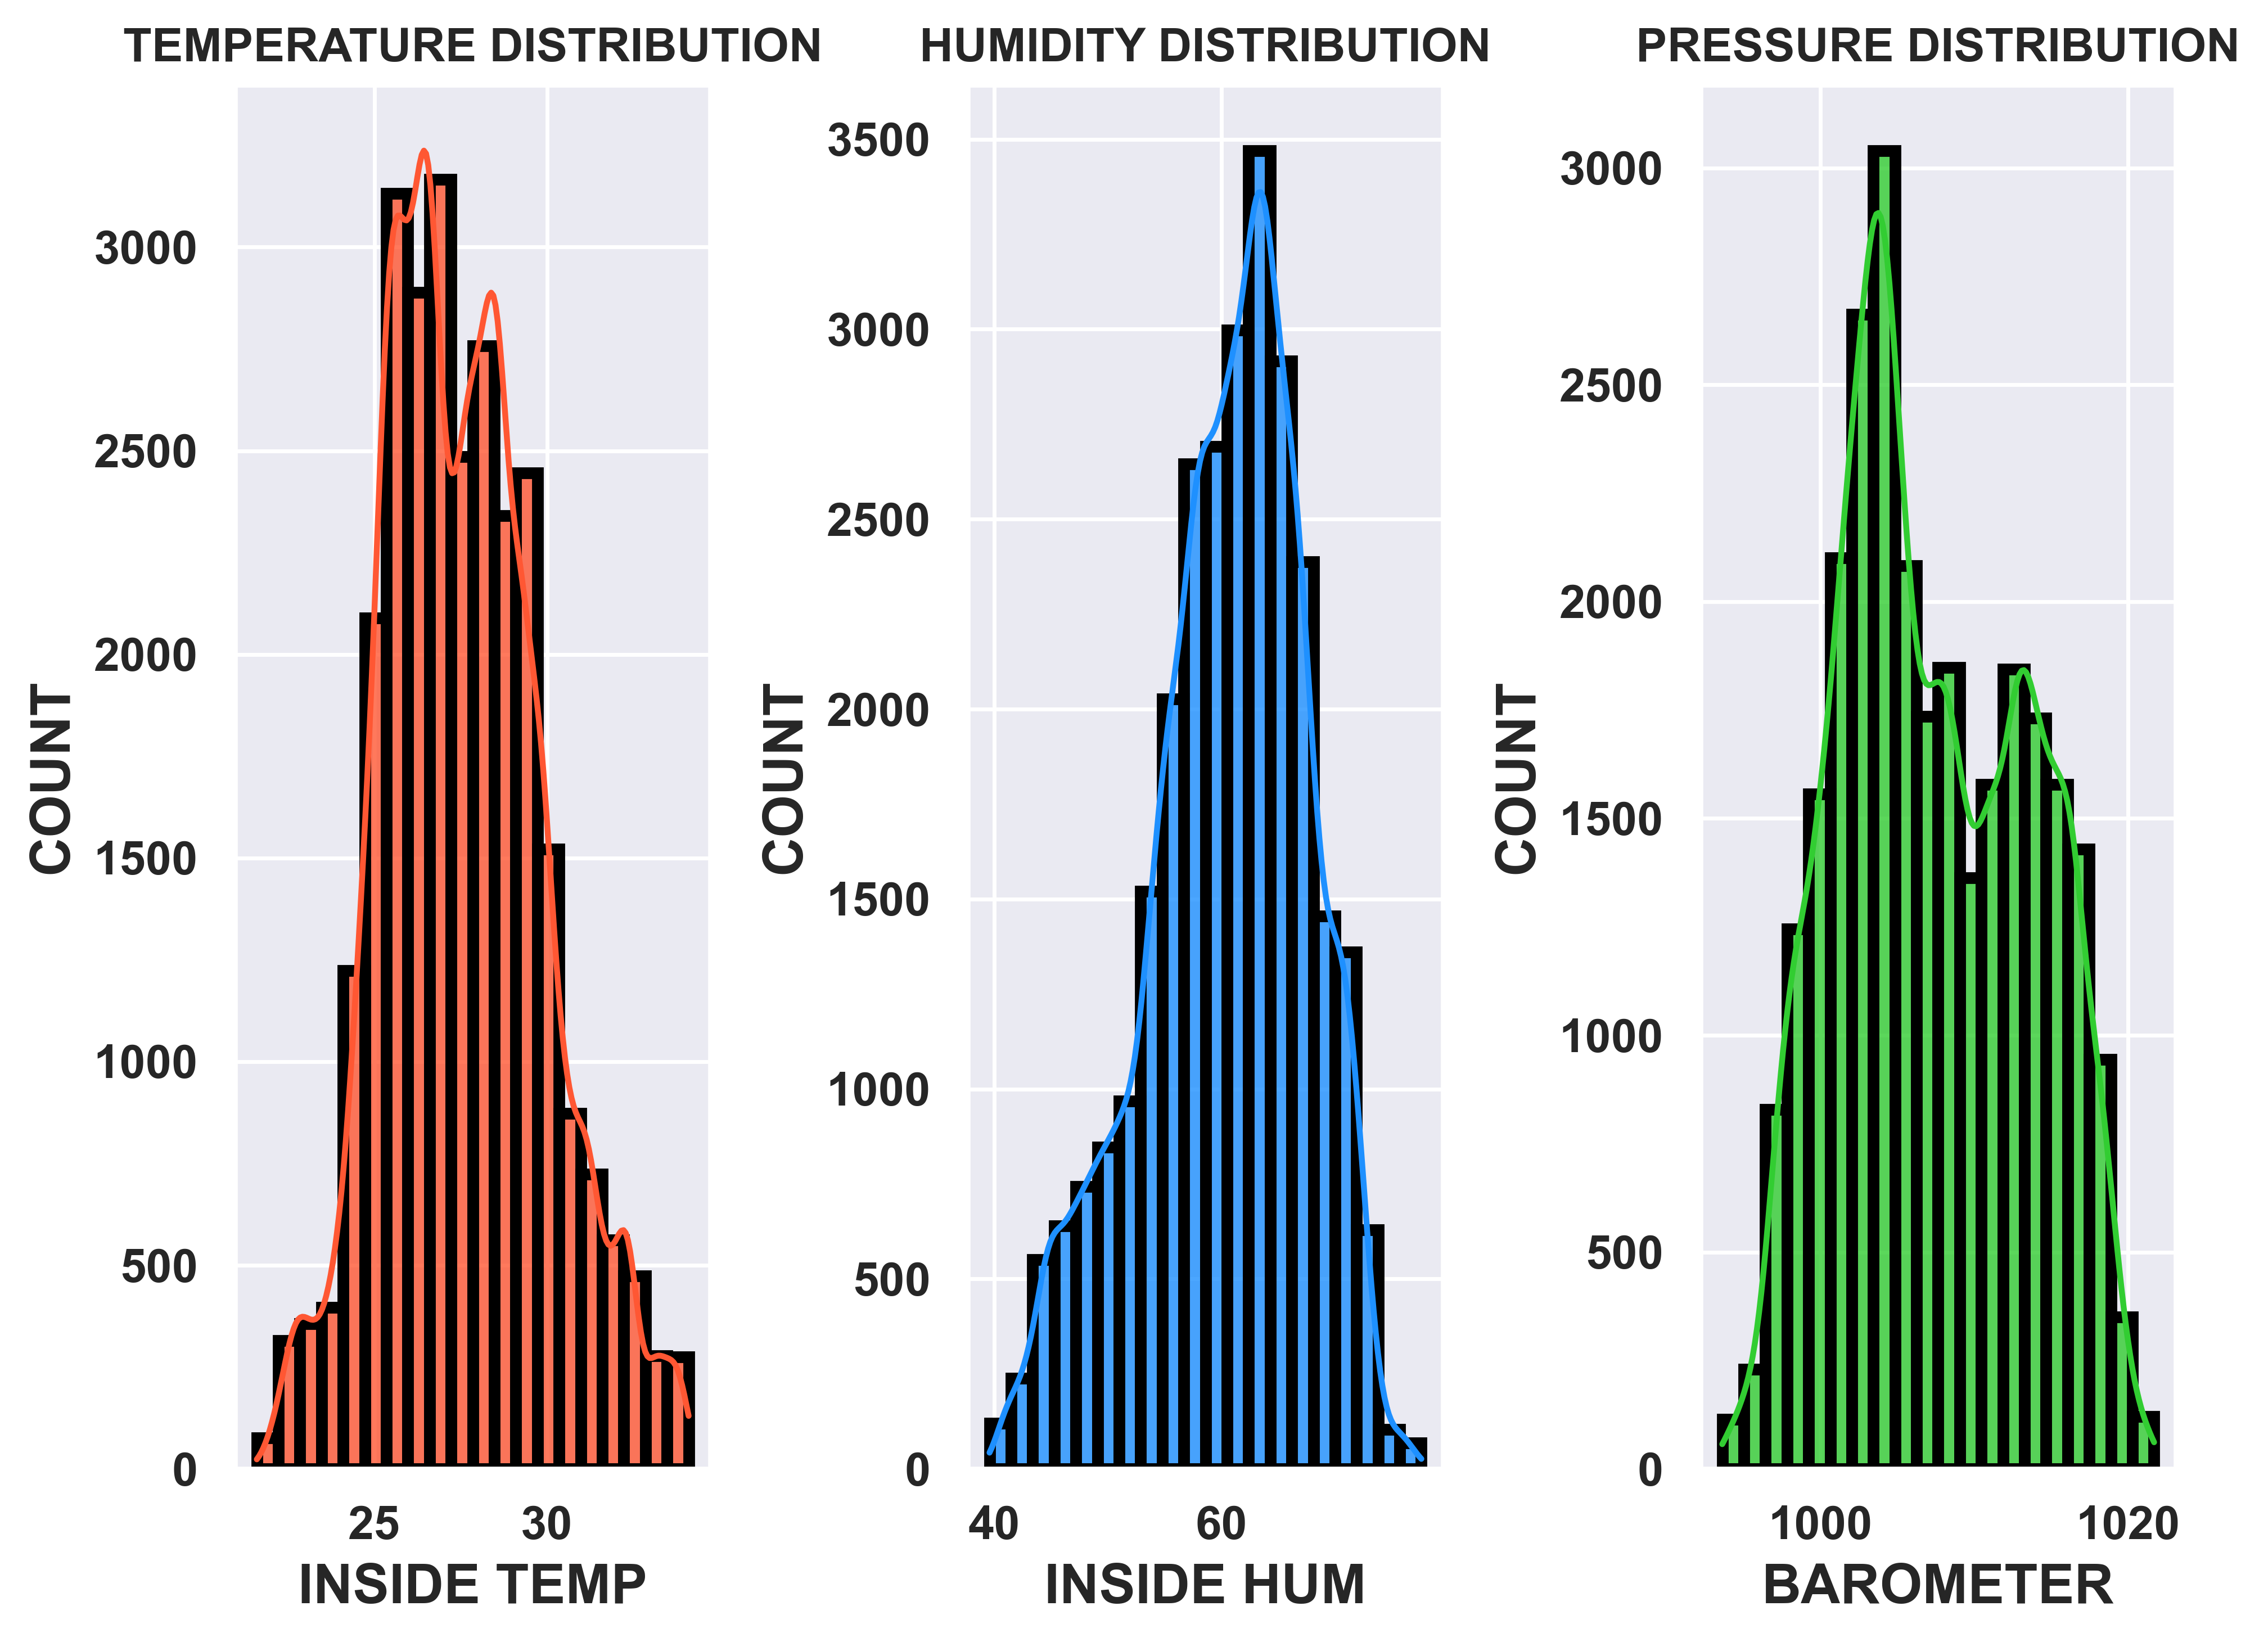

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(8,6), dpi=500)

sns.histplot(df["Inside Temp"], bins=20, kde=True, ax=axes[0], color='#FF5733', linewidth=3, edgecolor='black', alpha=0.8)
axes[0].set_title("TEMPERATURE DISTRIBUTION", fontsize=12, fontweight="bold")
axes[0].tick_params(labelsize=12, labelrotation=0)
axes[0].set_ylabel("COUNT", fontsize=14, fontweight="bold")
axes[0].set_xlabel("INSIDE TEMP", fontsize=14, fontweight="bold")  # Bold x-axis label
axes[0].set_xticklabels([f"{int(tick)}" for tick in axes[0].get_xticks()], fontsize=12, fontweight="bold")
axes[0].set_yticklabels([f"{int(tick)}" for tick in axes[0].get_yticks()], fontsize=12, fontweight="bold")

sns.histplot(df["Inside Hum"], bins=20, kde=True, ax=axes[1], color='#1E90FF', linewidth=3, edgecolor='black', alpha=0.8)
axes[1].set_title("HUMIDITY DISTRIBUTION", fontsize=12, fontweight="bold")
axes[1].tick_params(labelsize=12, labelrotation=0)
axes[1].set_ylabel("COUNT", fontsize=14, fontweight="bold")
axes[1].set_xlabel("INSIDE HUM", fontsize=14, fontweight="bold")  # Bold x-axis label
axes[1].set_xticklabels([f"{int(tick)}" for tick in axes[1].get_xticks()], fontsize=12, fontweight="bold")
axes[1].set_yticklabels([f"{int(tick)}" for tick in axes[1].get_yticks()], fontsize=12, fontweight="bold")

sns.histplot(df["Barometer"], bins=20, kde=True, ax=axes[2], color='#32CD32', linewidth=3, edgecolor='black', alpha=0.8)
axes[2].set_title("PRESSURE DISTRIBUTION", fontsize=12, fontweight="bold")
axes[2].tick_params(labelsize=12, labelrotation=0)
axes[2].set_ylabel("COUNT", fontsize=14, fontweight="bold")
axes[2].set_xlabel("BAROMETER", fontsize=14, fontweight="bold")  # Bold x-axis label
axes[2].set_xticklabels([f"{int(tick)}" for tick in axes[2].get_xticks()], fontsize=12, fontweight="bold")
axes[2].set_yticklabels([f"{int(tick)}" for tick in axes[2].get_yticks()], fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

### 📦 **BOXPLOT FOR OUTLIER DETECTION**
BOXPLOTS HELP **IDENTIFY OUTLIERS IN TEMPERATURE VALUES**.

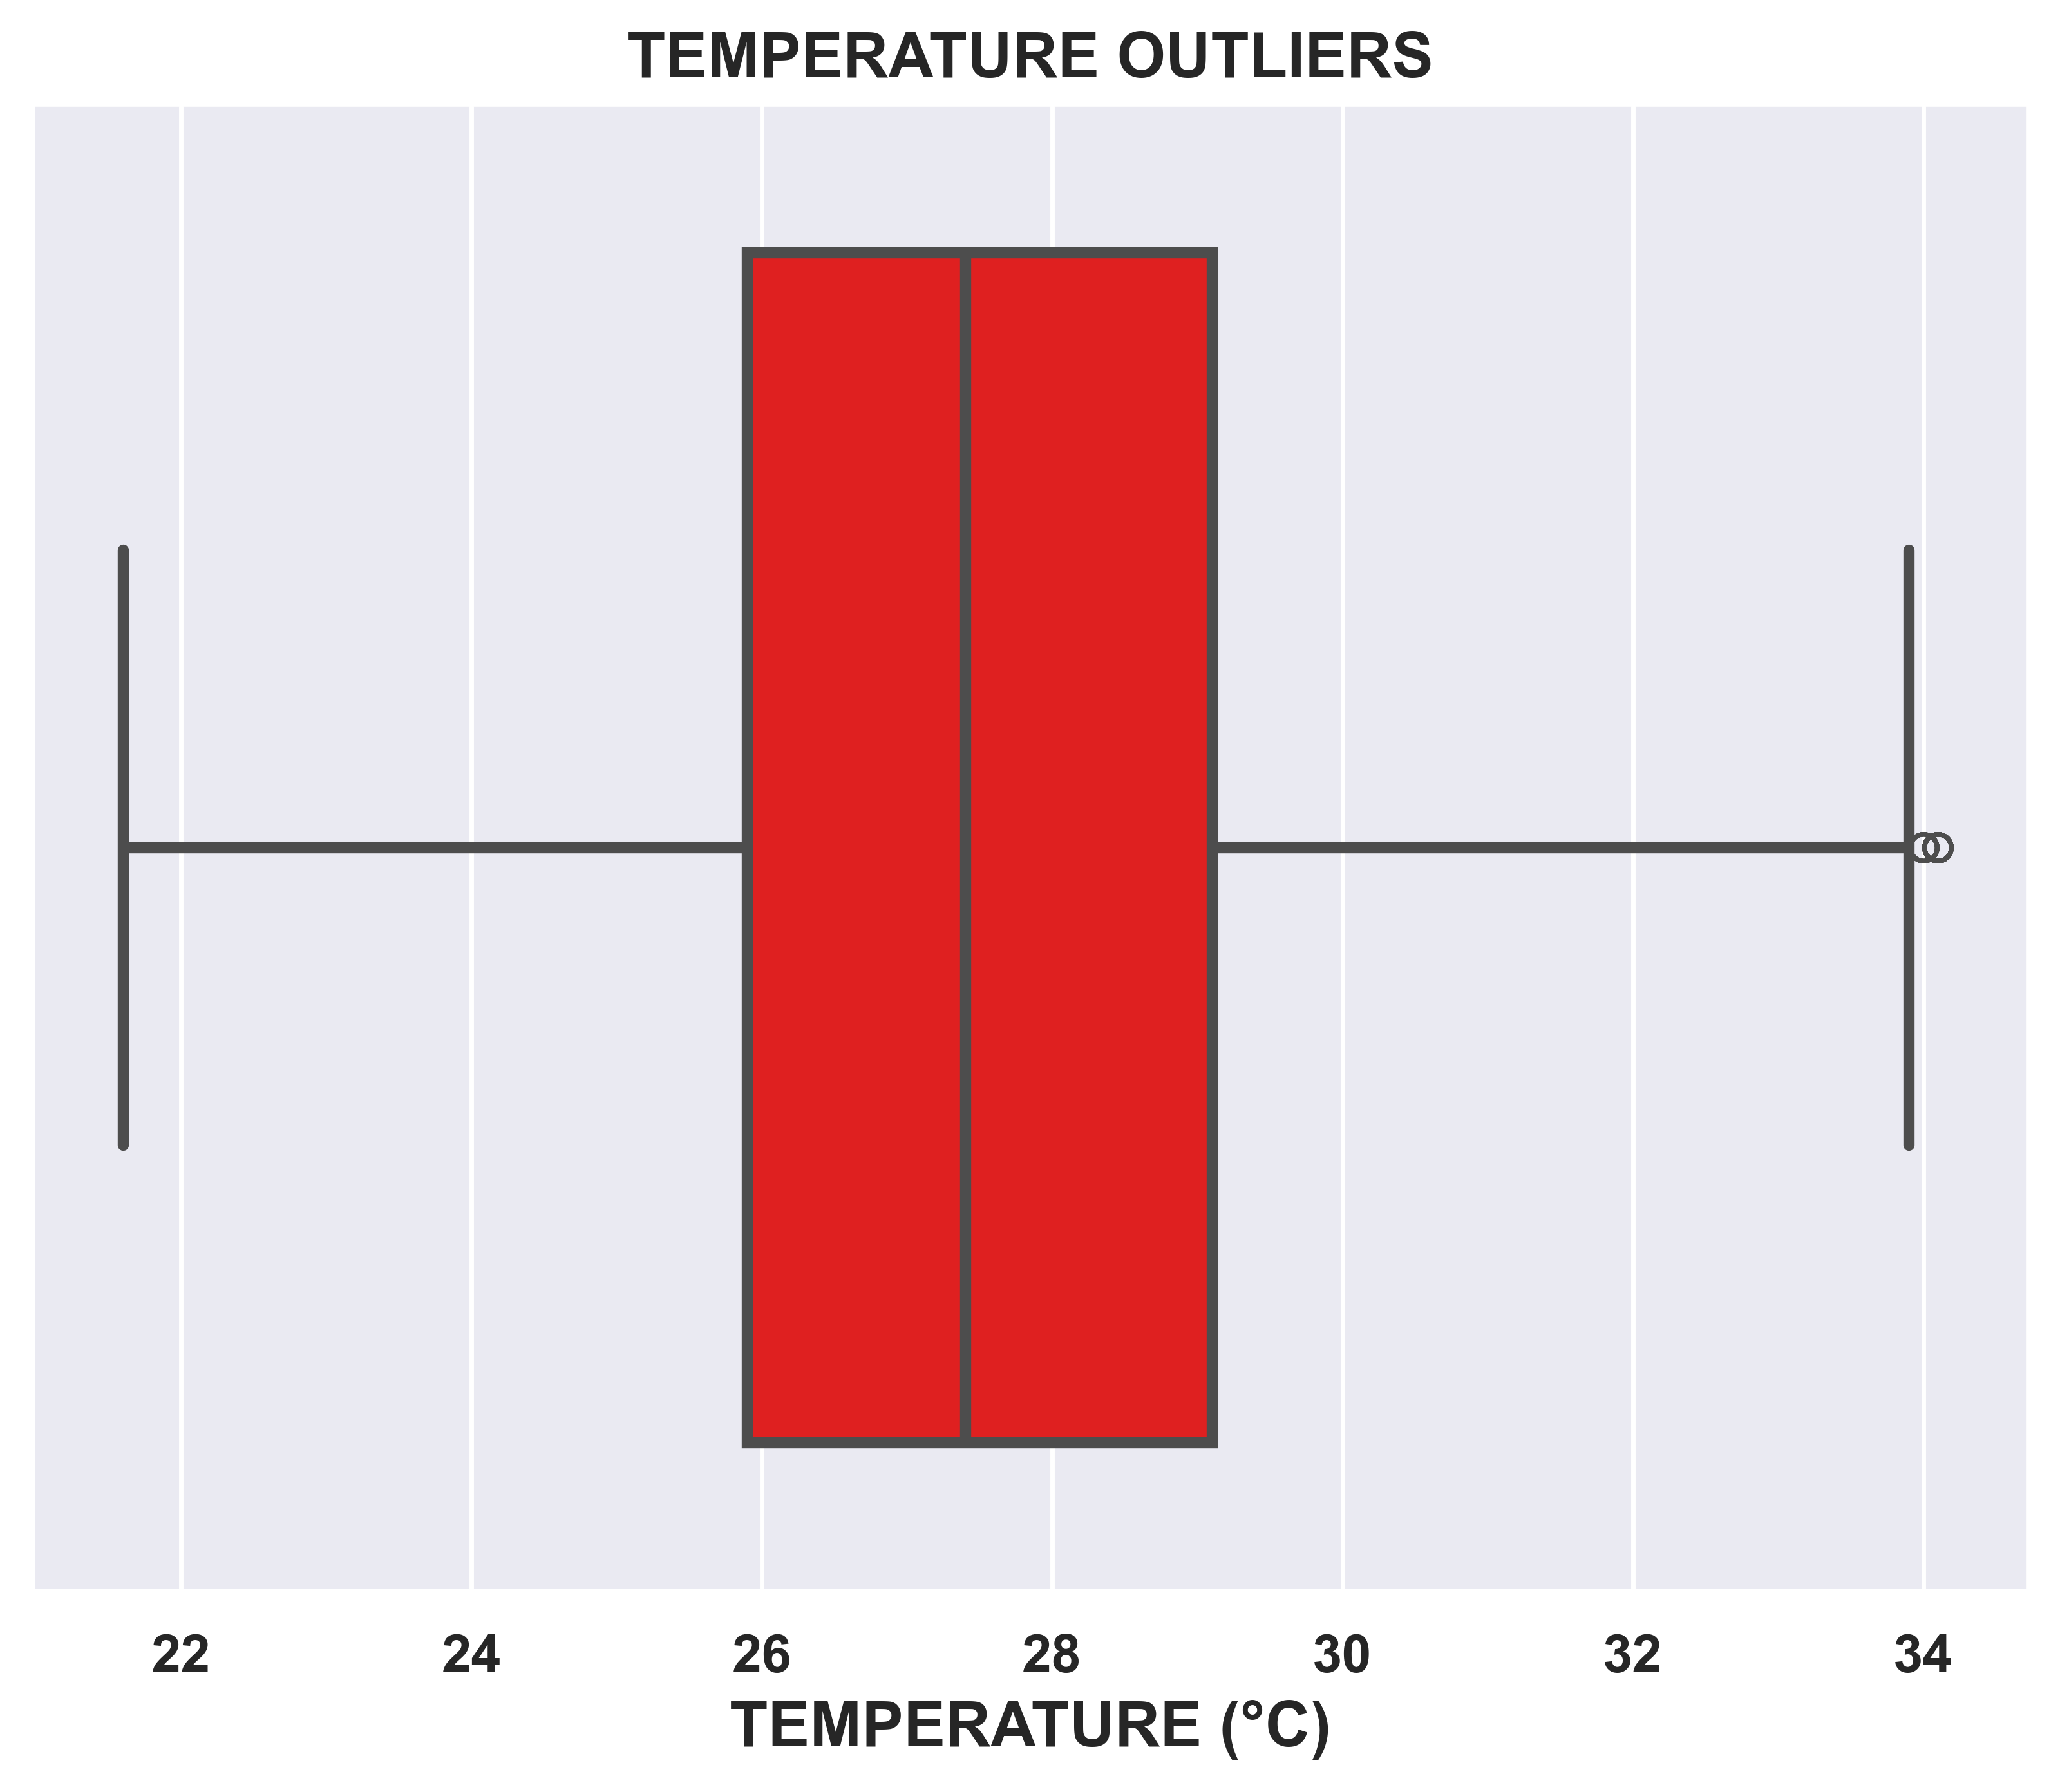

In [66]:
plt.figure(figsize=(8,6), dpi=500)
sns.boxplot(x=df["Inside Temp"], color='#FF0000', linewidth=2.5)

plt.title("TEMPERATURE OUTLIERS", fontsize=14, fontweight="bold")
plt.xlabel("TEMPERATURE (°C)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")

plt.show()

### 🔥 **CORRELATION HEATMAP**
THIS HEATMAP SHOWS HOW DIFFERENT FEATURES ARE **CORRELATED WITH EACH OTHER**.


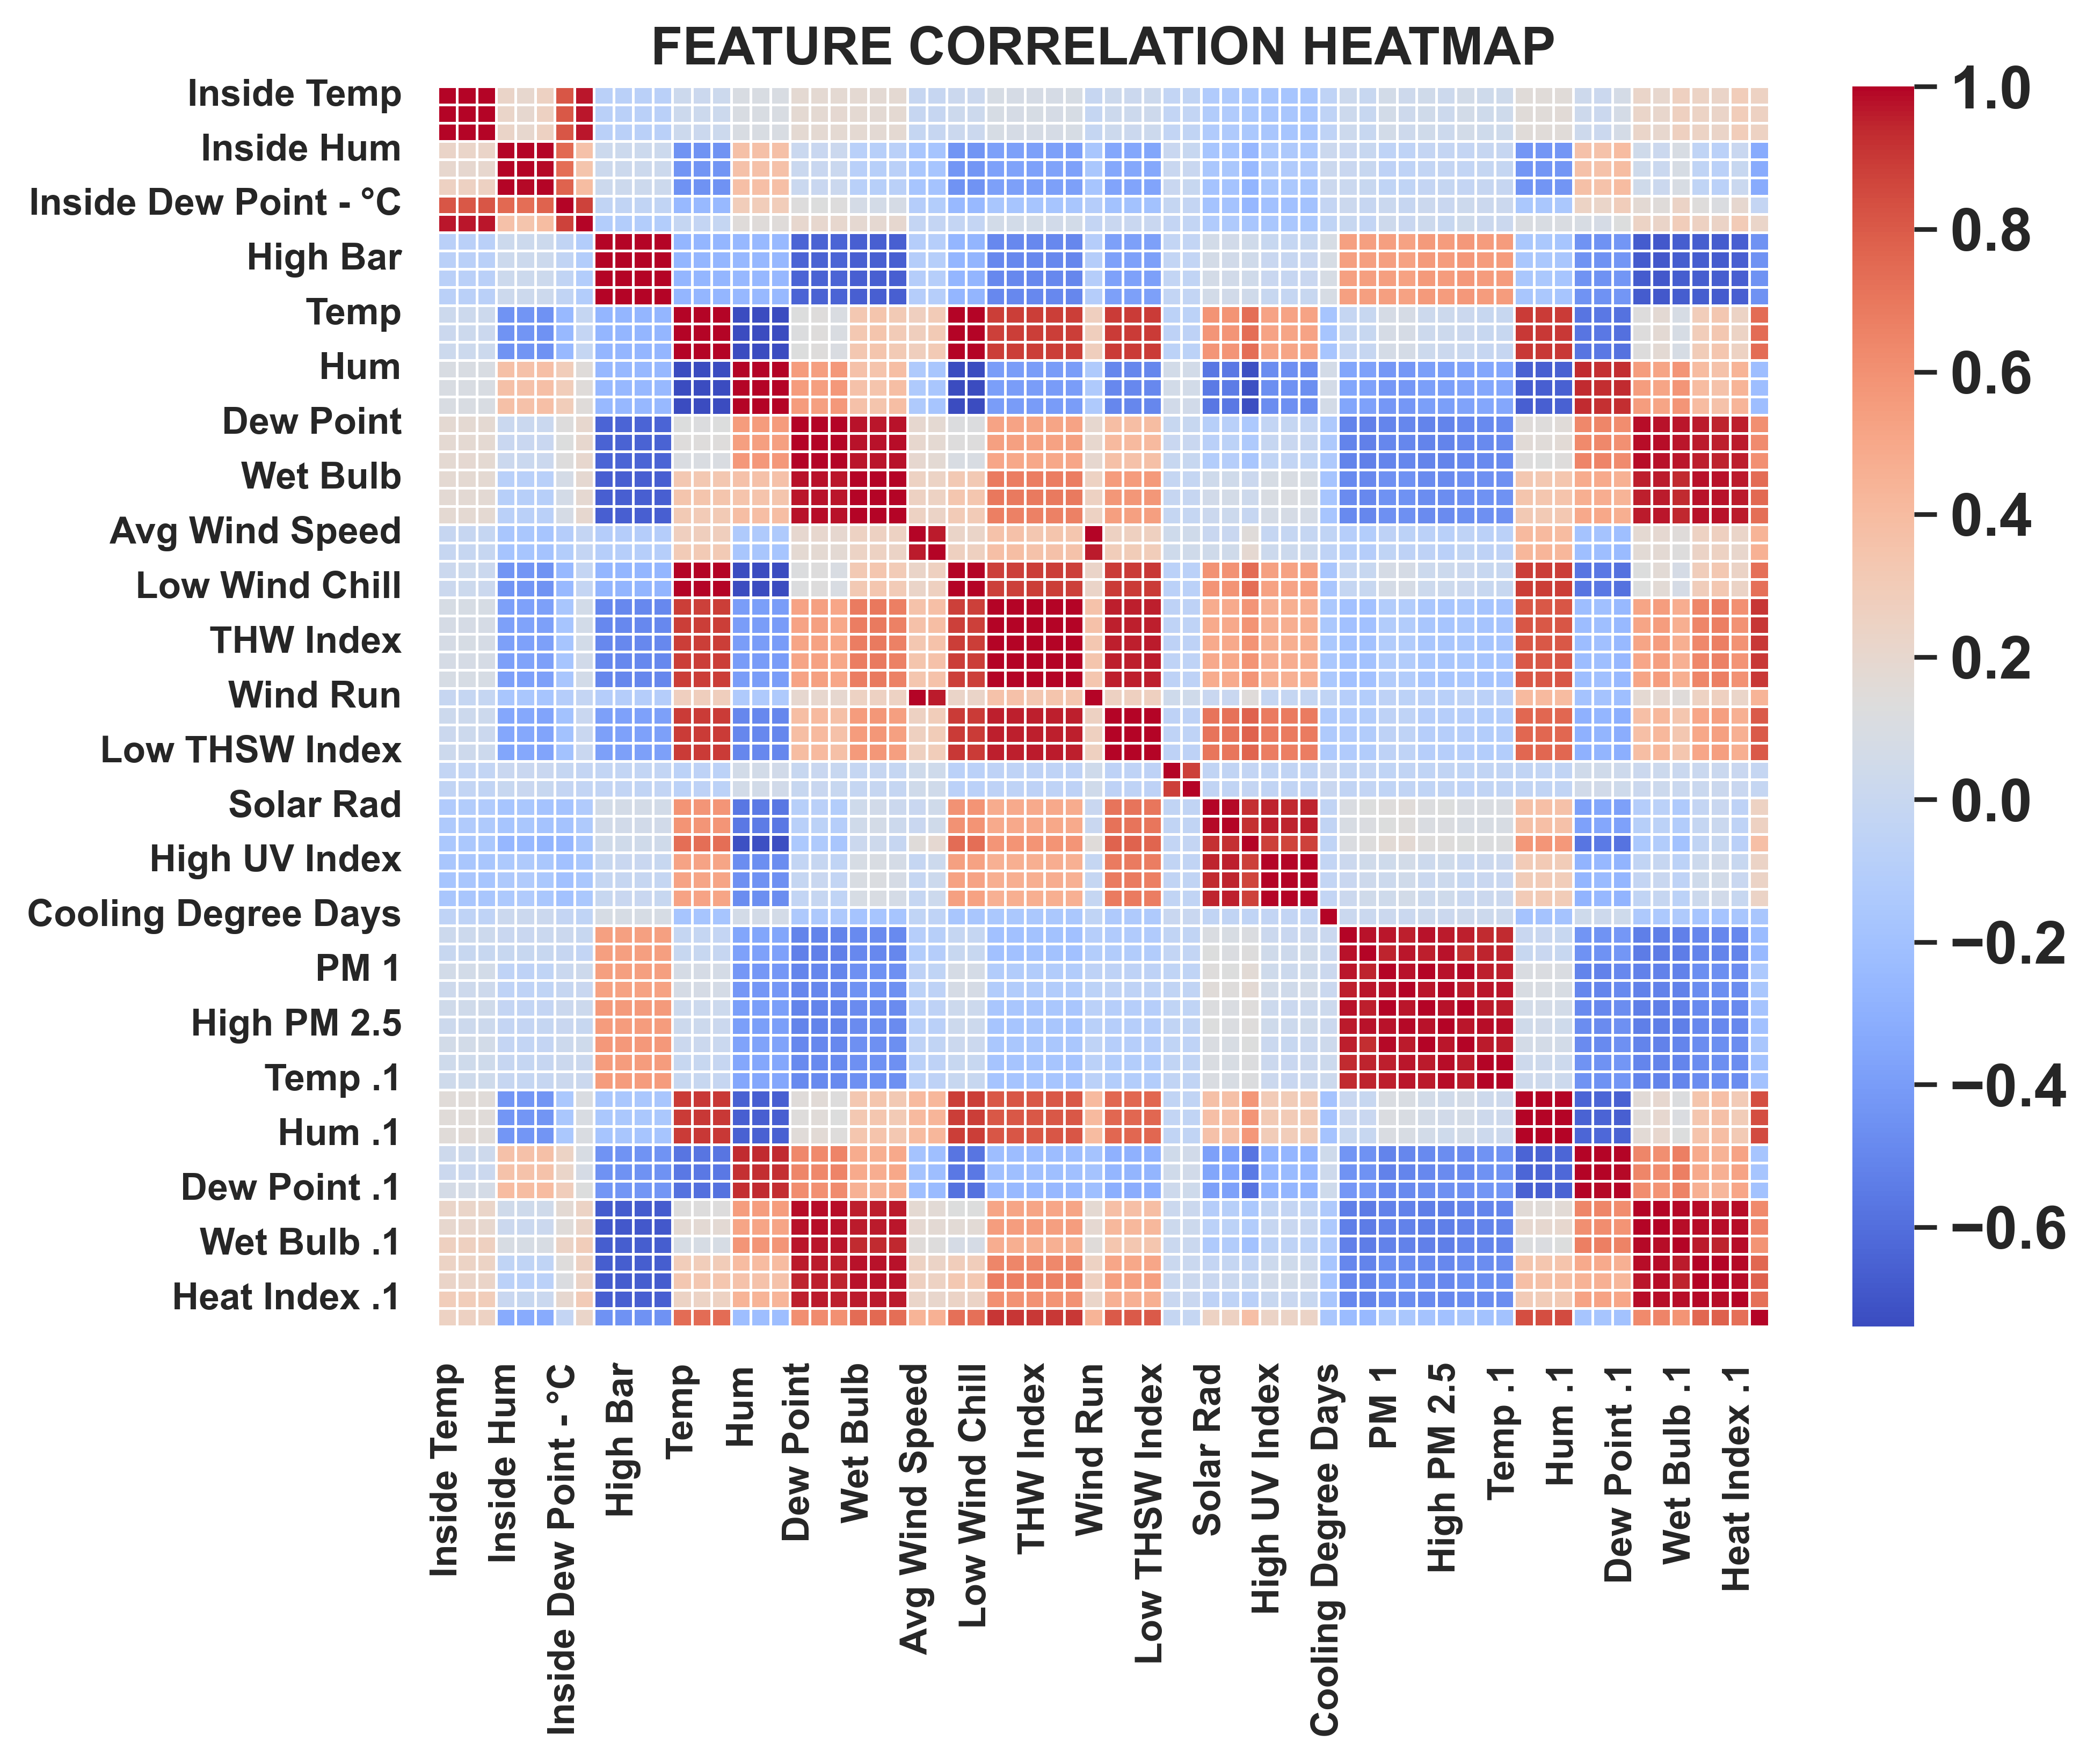

In [75]:
plt.figure(figsize=(8,6), dpi=500)

corr = df.select_dtypes(include=['float64', 'int64']).corr()
heatmap = sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)

plt.title("FEATURE CORRELATION HEATMAP", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold",)
plt.yticks(fontsize=10, fontweight="bold")

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)  
for label in colorbar.ax.get_yticklabels():
    label.set_fontweight('bold') 

plt.show()

### 🔄 **SCATTER PLOT: TEMPERATURE VS HUMIDITY**
THIS SCATTER PLOT HELPS **VISUALIZE THE RELATIONSHIP BETWEEN TEMPERATURE AND HUMIDITY**.


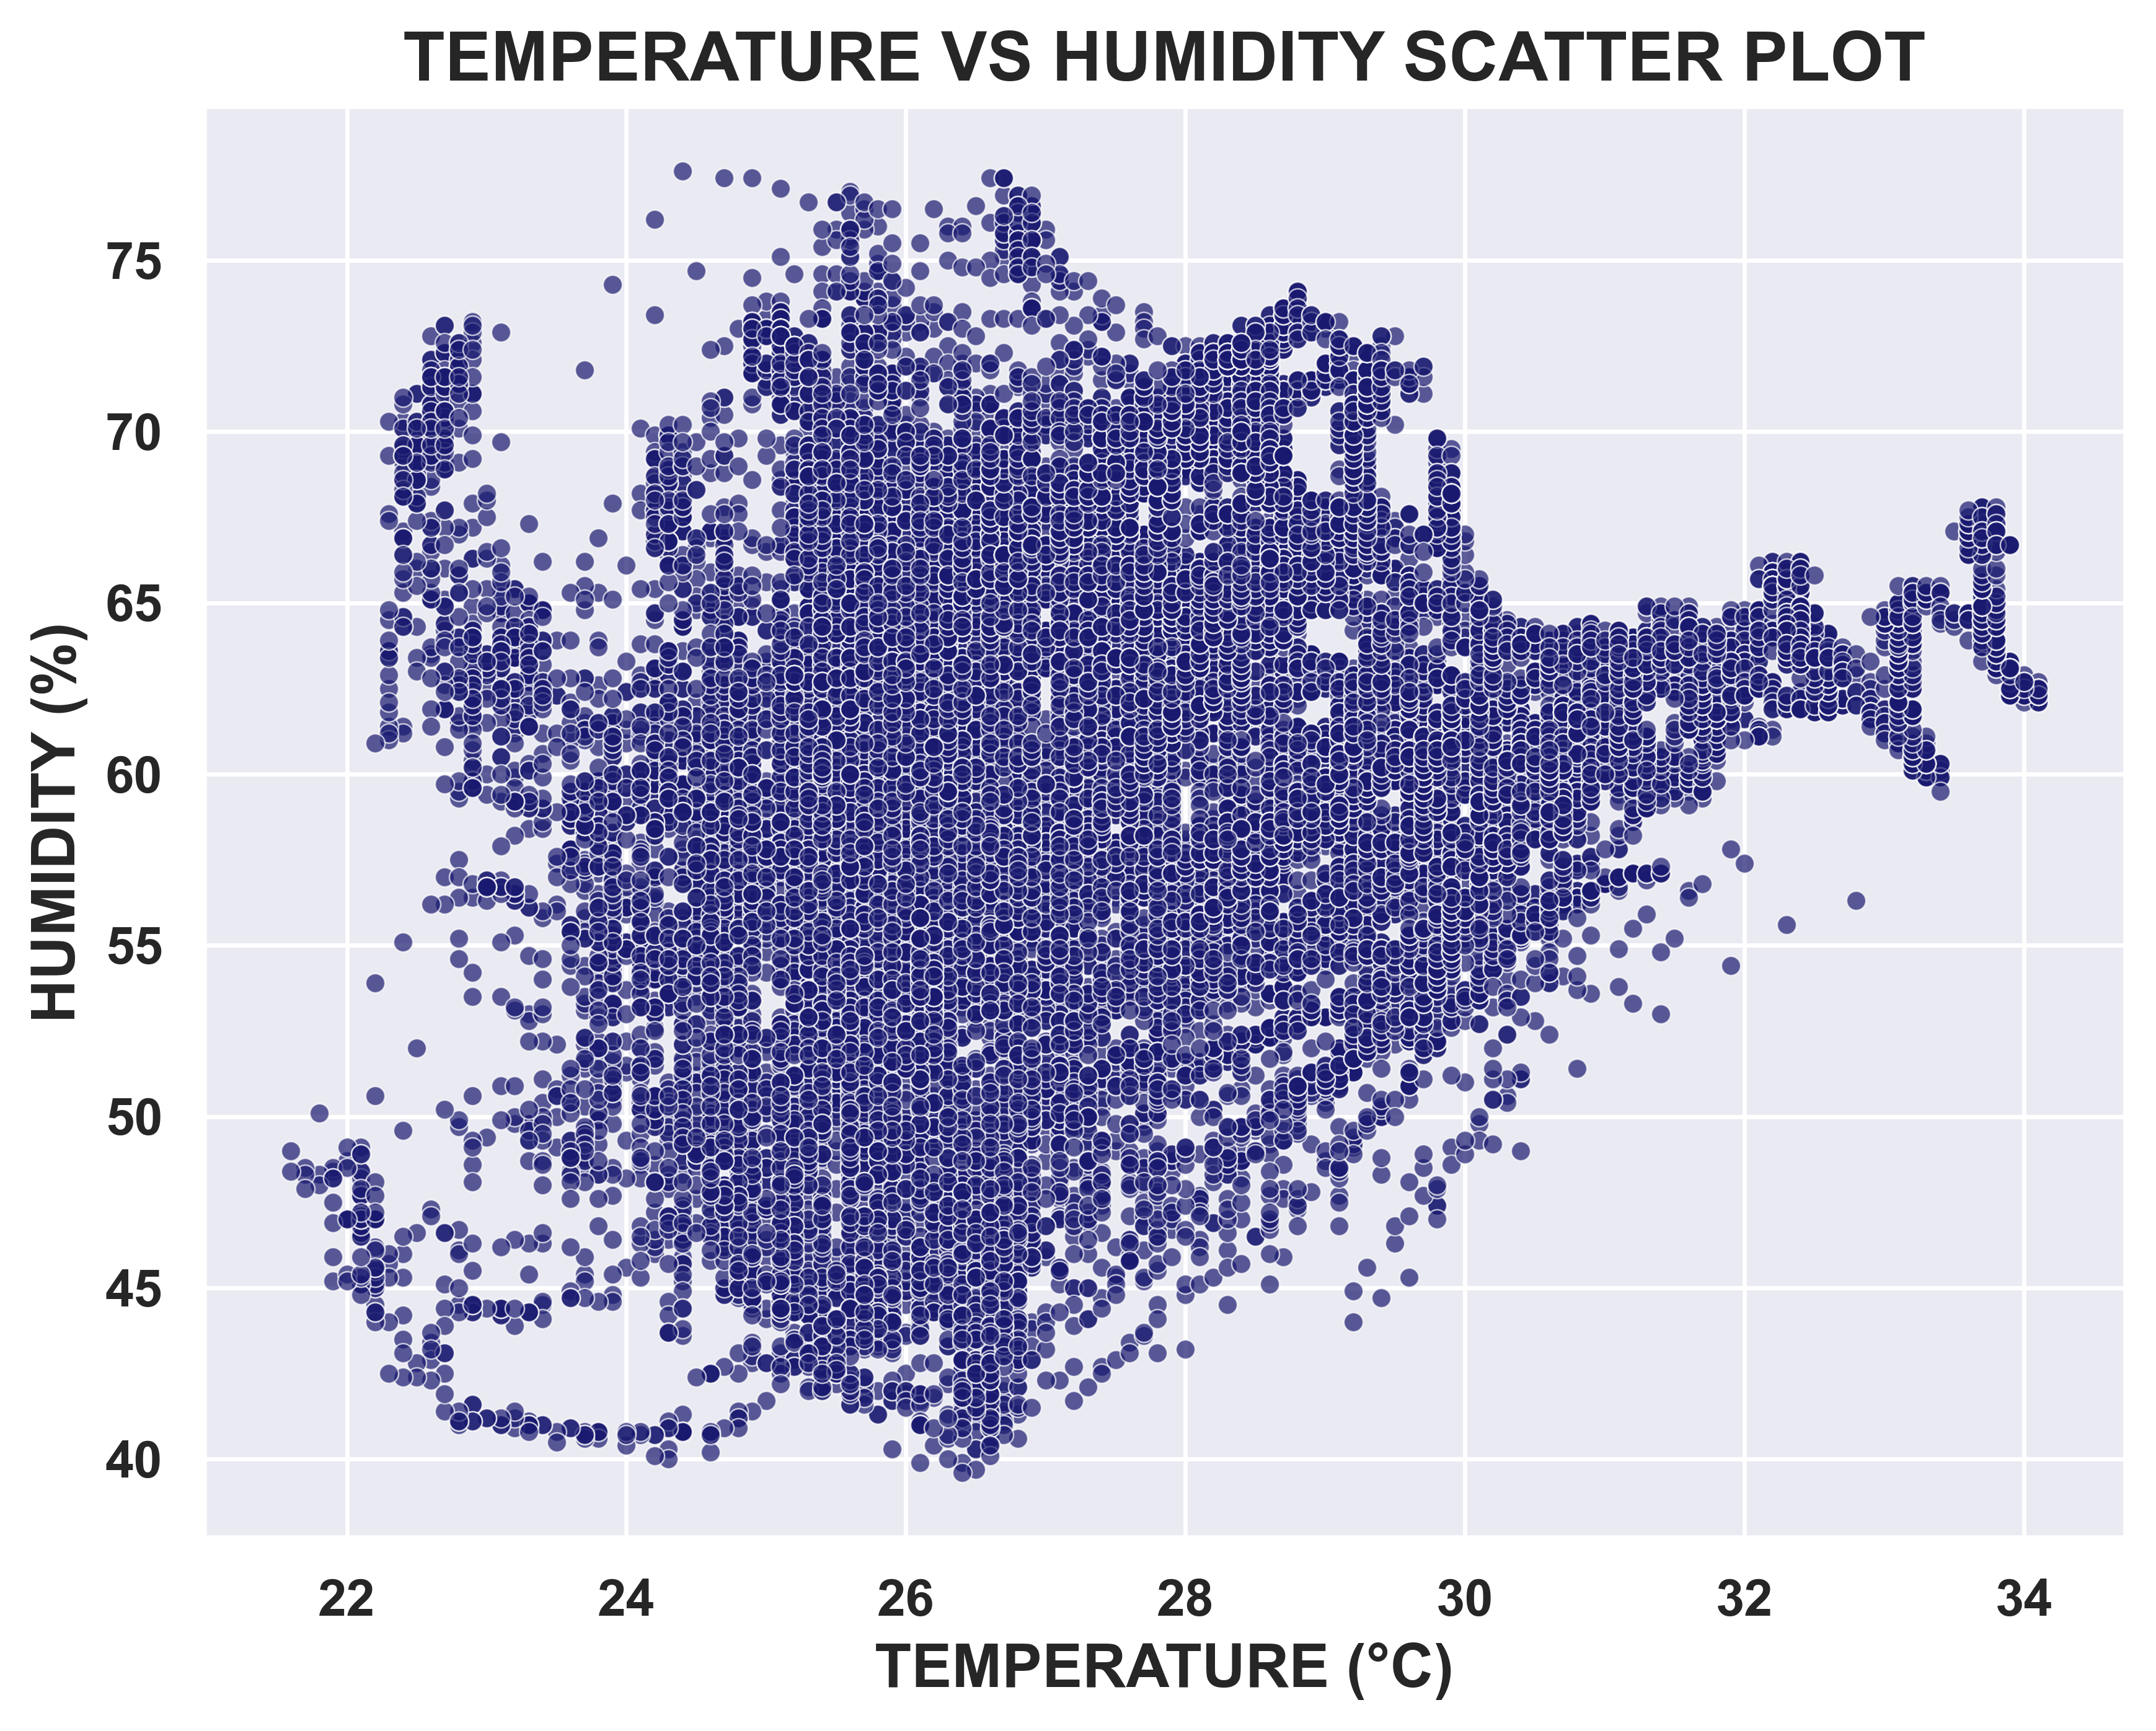

In [80]:
plt.figure(figsize=(8,6), dpi=500)
sns.scatterplot(x=df["Inside Temp"], y=df["Inside Hum"], alpha=0.7, color="#191970", s=20)

plt.xlabel("TEMPERATURE (°C)", fontsize=14, fontweight="bold")
plt.ylabel("HUMIDITY (%)", fontsize=14, fontweight="bold")
plt.title("TEMPERATURE VS HUMIDITY SCATTER PLOT", fontsize=16, fontweight="bold")

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

plt.show()